In [1]:
import time
start_time=time.time()

Abstract

Se presenta el procesamiento de observaciones astronómicas previamente reducidas obtenidas con el instrumento ISIS del WHT. El objetivo es obtener datos útiles viables para aplicar un análisis estadístico.

Se obtiene la velocidad radial mediante la siguiente ecuación:

$$\dfrac{\lambda_{obs}-\lambda}{\lambda}*c + Vhel_{corr} $$

Se obtiene la deconvolución del ancho de linea mediante la ecuación:

$$\sigma_{disp}^{2}=\sigma_{obs}^{2}-\sigma_{inst}^{2}-\sigma_{therm}^{2}$$

donde:

$$ \sigma_{obs} = \frac{0.6006}{1.414}* \frac{Width}{\lambda}*c , \sigma_{therm}^{2} = \frac{166.3}{1.414} \frac{T_{e} \times 10^{-4}}{w}$$

Libraries

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Astronomical observations 

In [3]:
input_file_0='604.Isis.WHT.Red.txt'
input_file_1='604.Isis.WHT.Blue.txt'

ISIS Red Data

In [4]:
data_0R=pd.read_table(input_file_0)#PandasDataFrameOriginalData
data_1R=data_0R.copy()#DataFrameForCalculations
data_1R.head()

,Pos,Slit,X,Y,Archivo,Center,ErrC,Width,ErrW,Peak,...,Line.3,ErrL.3,Center.4,ErrC.4,Width.4,ErrW.4,Peak.4,ErrP.4,Line.4,ErrL.4
0,1,1,199.81,19.6,604R1_778-001004.xlsx,6560.006,0.419,3.152,0.760,-19.79,...,6.9110,9.8280,6724.307,1.618,2.765,2.312,-3.363,3.125,-9.896,-12.140
1,2,1,198.47,19.6,604R1_778-005008.xlsx,6559.806,0.427,3.849,1.260,-18.81,...,1.5190,0.0000,6726.936,0.812,2.295,1.196,4.827,3.316,11.790,8.589
2,3,1,197.13,19.6,604R1_778-009012.xlsx,6565.844,6.249,28.117,18.167,-16.44,...,-7.2300,-6.1340,6723.383,0.606,1.294,0.730,2.938,4.510,4.045,7.195
3,4,1,195.79,19.6,604R1_778-013016.xlsx,6563.614,1.206,22.266,4.208,-14.54,...,-0.1011,-0.5723,6725.799,0.636,1.021,0.724,-8.003,6.818,-8.701,-7.102
4,5,1,194.45,19.6,604R1_778-017020.xlsx,6560.380,0.479,3.310,0.990,-16.68,...,-20.7700,-12.5400,6728.612,0.685,3.266,1.290,-4.778,3.152,-16.610,-9.432


ISIS Blue Data

In [5]:
data_0B=pd.read_table(input_file_1)#PandasDataFrameOriginalData
data_1B=data_0B.copy()#DataFrameForCalculations
data_1B.head()

,Pos,X,Y,Slit,Archivo,Center,ErrC,Width,ErrW,Peak,...,Line.1,ErrL.1,Center.2,ErrC.2,Width.2,ErrW.2,Peak.2,ErrP.2,Line.2,ErrL.2
0,1,214.5600,19.6,1,604a1_779-001004.xlsx,4809.715,10.003,-14.310,0.000,2.583,...,10.250,17.820,4961.214,27.812,41.454,52.778,0.6969,0.4512,30.75,53.460
1,2,213.1296,19.6,1,604a1_779-005008.xlsx,4861.424,10.792,-4.098,51.891,-4.734,...,-8.312,-8.531,4998.893,0.692,4.125,0.000,-5.6790,0.0000,-24.94,-25.590
2,3,211.6992,19.6,1,604a1_779-009012.xlsx,4855.140,0.822,2.562,1.256,-5.215,...,-64.520,-22.320,5022.750,12.843,69.658,32.632,-2.6100,0.7990,-193.60,-66.960
3,4,210.2688,19.6,1,604a1_779-013016.xlsx,4852.843,0.305,-1.164,0.923,-9.482,...,-3.841,-1.507,5004.753,0.192,0.961,0.346,-11.2600,4.0020,-11.52,-4.521
4,5,208.8384,19.6,1,604a1_779-017020.xlsx,4875.295,0.294,0.489,0.375,8.143,...,-1.367,-4.403,5004.175,0.000,0.787,0.000,-4.8920,0.0000,-4.10,-13.210


Input data

In [6]:
#Input
Dist=847000#pc
asctopc=(2*np.pi*Dist)/(60*60*360)

#Iraf
corrhelio=25.68#km/s

#Literature
T=8350#K

#Constant
c=299792.459#km/s

#Theory Lambda
lha=6562.8#Angstroms
lhb=4861#Angstroms
loiii=5008#Angstroms
ls=6731#Angstroms
ln=6583#Angstroms

#Atomic Weights
Hw=1.00794#
Nw=14.0067#
Sw=32.065#
Ow=15.9994#

#SigmaInst:Observations
SigmaInstH=18#km/s
SigmaInstN=12#km/s
SigmaInstS=15#km/s
SigmaInstO=19#km/s

#plots Y size
sz=4

Data centered on the region

In [7]:
#mIr=data_1R.Peak>data_1R.Peak.mean()+1*data_1R.Peak.std()
#dataR=data_1R[mIr]

#mIb=data_1B.Peak>data_1B.Peak.mean()+1*data_1B.Peak.std()
#dataB=data_1B[mIb]

mr=(data_1R.X<145)&(data_1R.X>65)
dataR=data_1R[mr]
mb=(data_1B.X<135)&(data_1B.X>95)
dataB=data_1B[mb]

Emission lines Tables

In [8]:
dataHa=dataR[['X','Y','Center','Peak','Width']]
#dataHa.describe()

In [9]:
dataHb=dataB[['X','Y','Center','Peak','Width']]
#dataHb.head()

In [10]:
dataN=dataR[['X','Y','Center.2','Peak.2','Width.2']]
#dataN.describe()

In [11]:
dataS=dataR[['X','Y','Center.4','Peak.4','Width.4']]
#dataS.describe()

In [12]:
dataO=dataB[['X','Y','Center.2','Peak.2','Width.2']]
#dataHb.head()

'Aspect Ratio' plots based on lenght data

In [13]:
wd=dataHa.X.max()-dataHa.X.min()
hd=dataHa.Y.max()-dataHa.Y.min()
ar=wd/hd

In [14]:
wd2=dataO.X.max()-dataO.X.min()
hd2=dataO.Y.max()-dataO.Y.min()
ar2=wd2/hd2

# Ha Emission

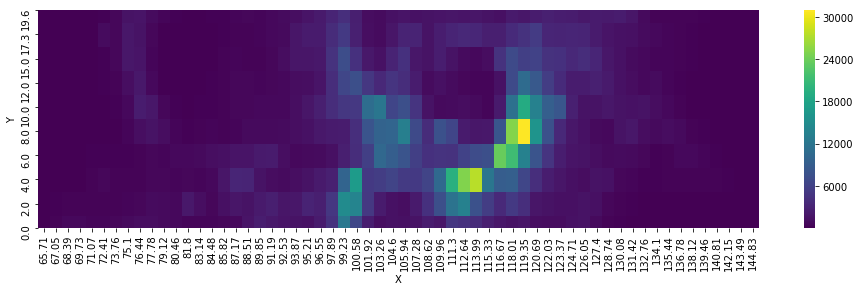

In [15]:
dataHf=(dataHa.round(2)).pivot(index='Y', columns='X', values='Peak')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataHf, cmap="viridis")
plt.gca().invert_yaxis()

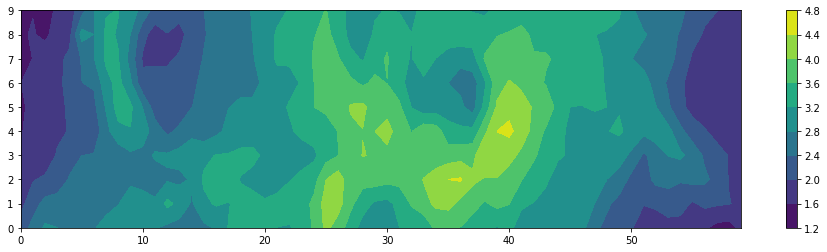

In [16]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(np.log10(dataHf))
plt.colorbar()

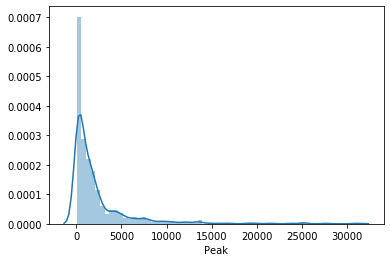

In [17]:
sns.distplot(dataHa.Peak,bins=60)

# Ha Radial velocity 

In [18]:
RVHao=c*(dataHa.Center-lha)/lha

In [19]:
RVHa=RVHao+corrhelio
RVHa.describe()

count    600.000000
mean    -250.043594
std       10.420092
min     -277.593319
25%     -257.836471
50%     -249.888052
75%     -244.018098
max     -205.463695
Name: Center, dtype: float64

In [20]:
dataHa=dataHa.assign(RV=RVHa.values)
dataHa.head()

,X,Y,Center,Peak,Width,RV
41,144.83,19.6,6556.792,73.97,0.780,-248.768878
42,143.49,19.6,6556.771,94.17,0.926,-249.728170
43,142.15,19.6,6556.704,101.40,0.970,-252.788768
44,140.81,19.6,6556.538,118.20,1.154,-260.371743
45,139.46,19.6,6556.321,180.00,1.250,-270.284427


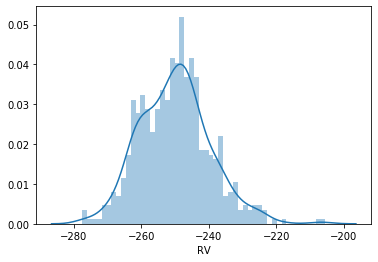

In [21]:
sns.distplot(dataHa.RV,bins=50)

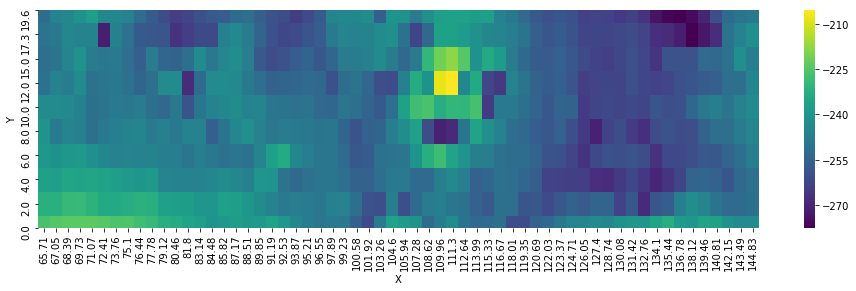

In [22]:
dataHrv=(dataHa.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataHrv, cmap="viridis")
plt.gca().invert_yaxis()

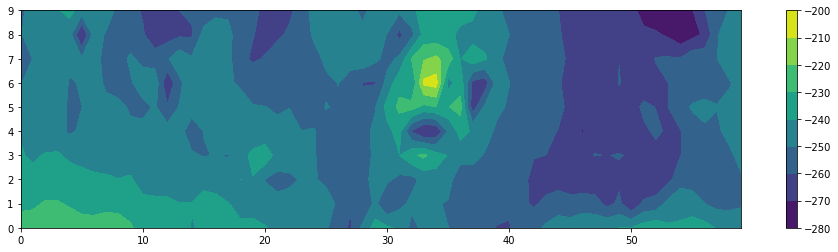

In [23]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataHrv)
plt.colorbar()

# Ha Sig  Width 

In [24]:
mH0=dataHa["Width"]>0
dataHa=dataHa[mH0]

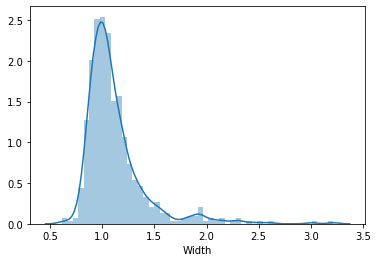

In [25]:
sns.distplot(dataHa.Width,bins=50)

In [26]:
#m2=dataHa.Width>dataHa.Width.mean()+0.5*dataHa.Width.std()
#dataR=data_1R[mIr]
#m2=(dataHa.Width<3)&(dataHa.Width>0)
#sns.distplot(dataHa[m2].Width,bins=30)

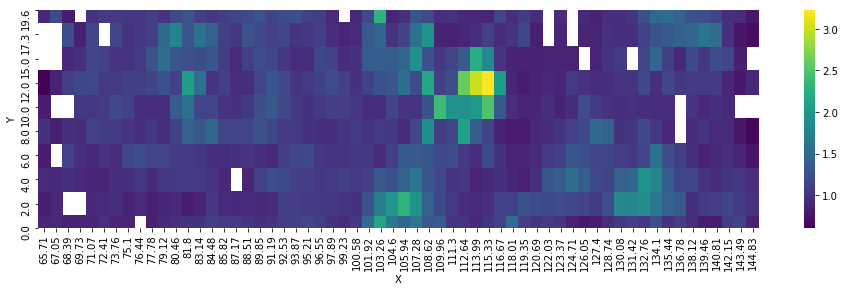

In [27]:
dataHw=(dataHa.round(2)).pivot(index='Y', columns='X', values='Width')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataHw, cmap="viridis")
plt.gca().invert_yaxis()


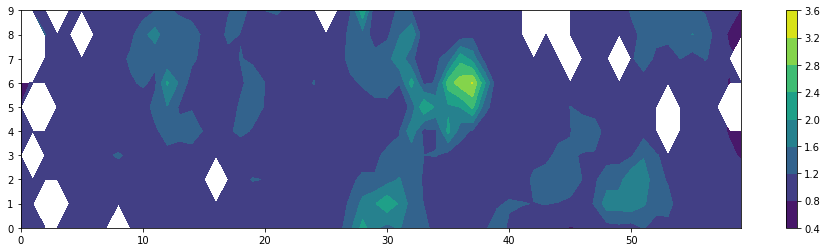

In [28]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataHw)
plt.colorbar()

# Ha Sigma Disp

Sigma obs

In [29]:
a=0.6006/1.414
SigmaObs=a*(dataHa.Width/lha)*c
#SigmaObs

Sigma therm

In [30]:
b=166.6/1.414
SigmaTerm=np.sqrt(b*(T/10000)/Hw)
SigmaTerm

9.87958475499144

In [31]:
SigmaDisp=np.sqrt(SigmaObs**2-SigmaTerm**2-SigmaInstH**2)
SigmaDisp.describe()

/home/zalenovo/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    267.000000
mean      13.538253
std        9.649546
min        0.775992
25%        6.845044
50%       11.141653
75%       16.958050
max       58.904270
Name: Width, dtype: float64

In [32]:
dataHs=dataHa
dataHs=dataHs.assign(SigmaD=SigmaDisp.values)
dataHs.describe()

,X,Y,Center,Peak,Width,RV,SigmaD
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,267.000000
mean,105.552400,9.255826,6556.763313,2327.422887,1.120390,-250.079314,13.538253
std,22.787326,6.233617,0.227533,3811.846974,0.296957,10.393827,9.649546
min,65.710000,0.000000,6556.161000,27.150000,0.614000,-277.593319,0.775992
25%,85.820000,4.000000,6556.598000,300.250000,0.951500,-257.630909,6.845044
50%,105.940000,8.000000,6556.767000,1044.000000,1.046000,-249.910892,11.141653
75%,124.710000,15.000000,6556.894000,2403.500000,1.190500,-244.109459,16.958050
max,144.830000,19.600000,6557.740000,30960.000000,3.215000,-205.463695,58.904270


/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/zalenovo/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


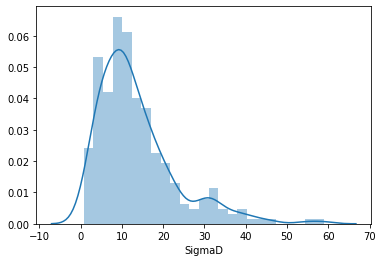

In [33]:
sns.distplot(dataHs.SigmaD,bins=25)

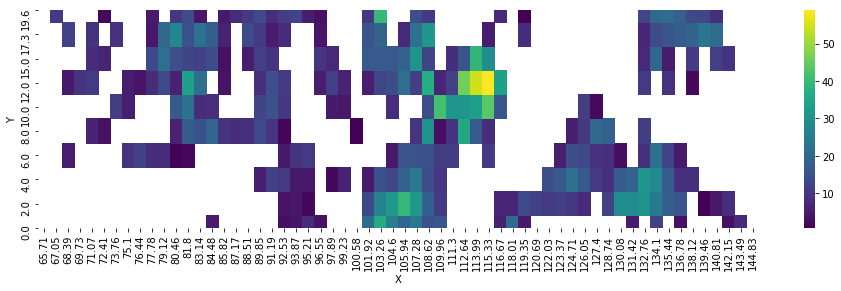

In [34]:
dataHsg=(dataHs.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataHsg, cmap="viridis")
plt.gca().invert_yaxis()

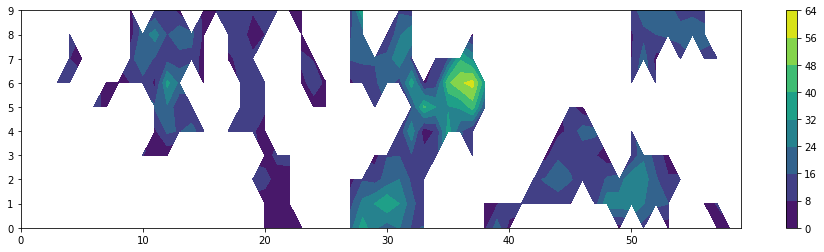

In [35]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataHsg)
plt.colorbar()

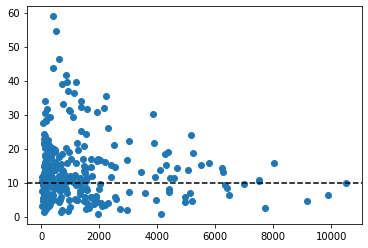

In [36]:
plt.scatter(dataHs.Peak,dataHs.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')

# [NII] 6583 Emission 


In [37]:
dataN.head()

,X,Y,Center.2,Peak.2,Width.2
41,144.83,19.6,6579.214,12.010,9.234
42,143.49,19.6,6581.037,9.836,11.762
43,142.15,19.6,6577.277,24.740,1.265
44,140.81,19.6,6577.335,30.080,0.953
45,139.46,19.6,6576.976,32.900,1.279


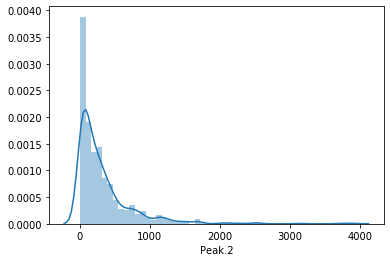

In [38]:
sns.distplot(dataN["Peak.2"],bins=50)

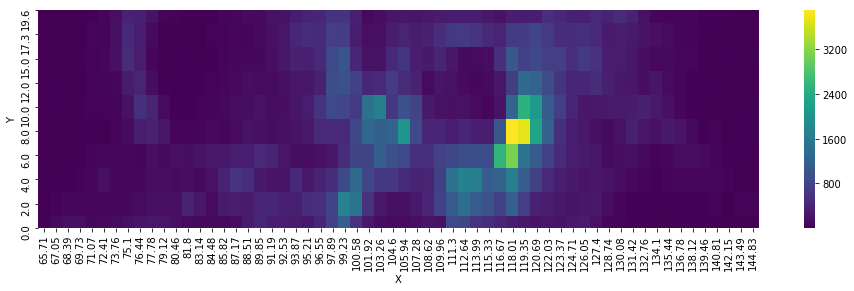

In [39]:
dataNf=(dataN.round(2)).pivot(index='Y', columns='X', values='Peak.2')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataNf, cmap="viridis")
plt.gca().invert_yaxis()


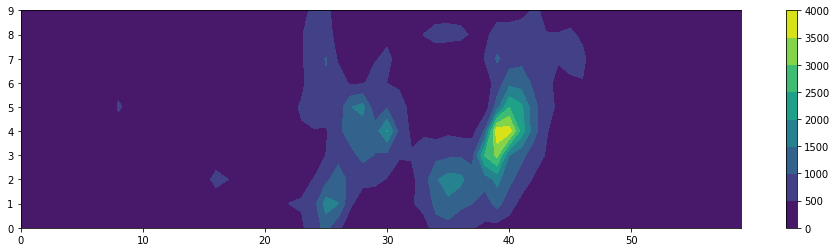

In [40]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataNf)
plt.colorbar()

# [NII] Radial velocity 

In [41]:
RVNo=c*((dataN["Center.2"]-ln)/ln)
#RVNo.describe()

Corr. Hel.

In [42]:
RVN=RVNo+corrhelio
#RVN.describe()

In [43]:
dataN=dataN.assign(RV=RVN.values)

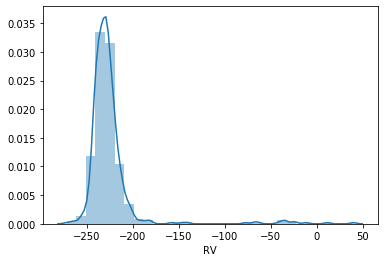

In [44]:
sns.distplot(dataN.RV,bins=30)

Data Adjust

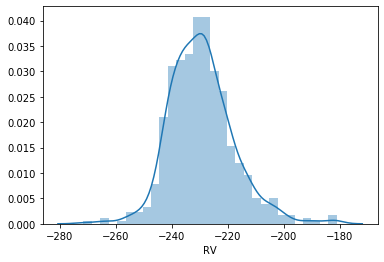

In [45]:
mn=dataN.RV<dataN.RV.mean()+2*dataN.RV.std()
sns.distplot(dataN[mn].RV,bins=30)

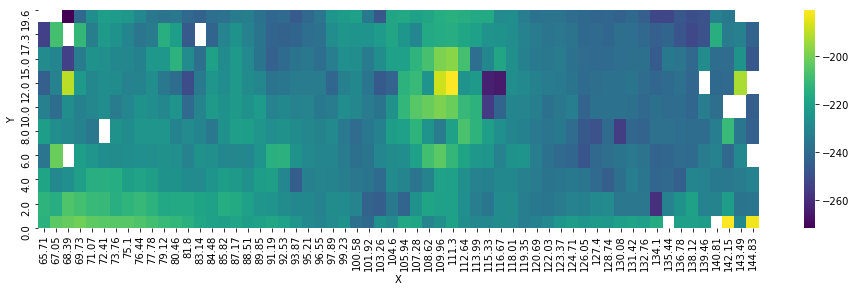

In [46]:
dataNrv=(dataN[mn].round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataNrv, cmap="viridis")
plt.gca().invert_yaxis()

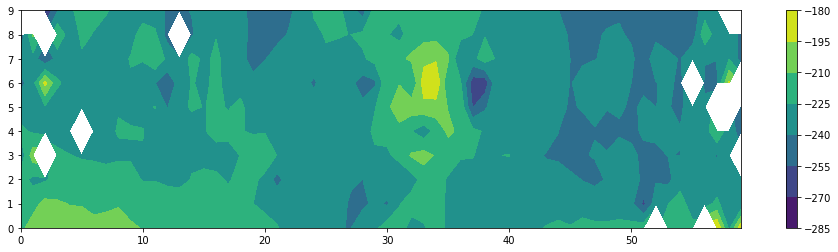

In [47]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataNrv)
plt.colorbar()

# [NII] 6584 Sig Width

In [48]:
mn0=dataN["Width.2"]>0
dataN=dataN[mn0]

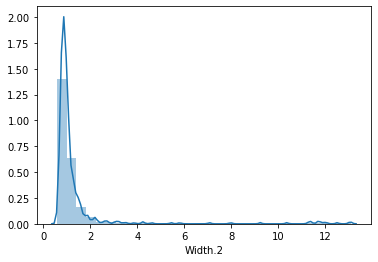

In [49]:
sns.distplot(dataN["Width.2"],bins=30)

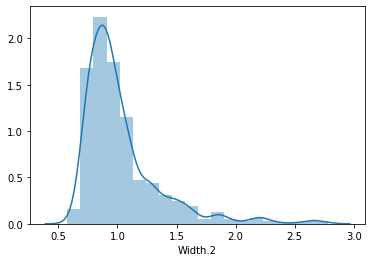

In [50]:
mns=dataN["Width.2"]<(dataN["Width.2"].mean()+1*dataN["Width.2"].std())
dataN=dataN[mns]
sns.distplot(dataN["Width.2"][mns],bins=20)

/home/zalenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


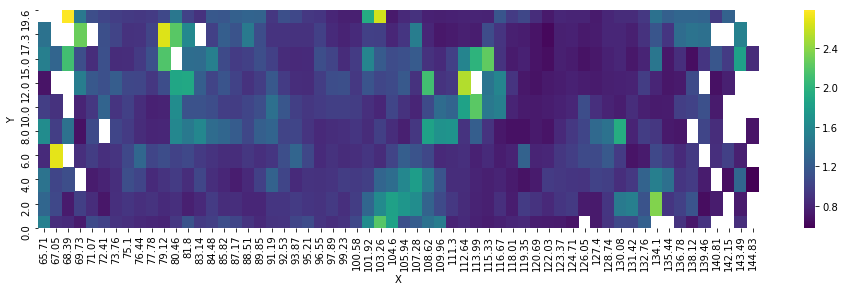

In [51]:
dataNw=(dataN[mns].round(2)).pivot(index='Y', columns='X', values='Width.2')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataNw, cmap="viridis")
plt.gca().invert_yaxis()

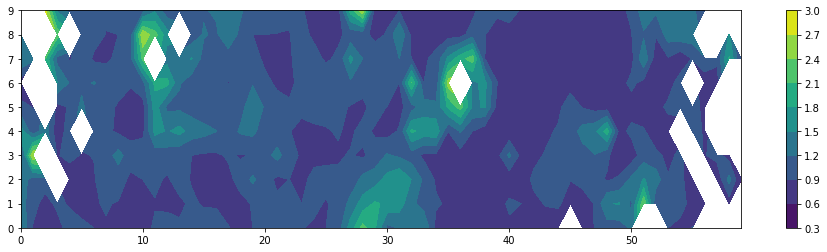

In [52]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataNw)
plt.colorbar()

#  [NII] 6584 Sigma Disp

In [53]:
a=0.6006/1.414
SigmaObsN=a*(dataN["Width.2"]/lha)*c
SigmaObsN

43      24.544714
44      18.490998
45      24.816355
46      25.262623
47      25.165608
          ...    
1446    20.838753
1447    14.416382
1448    16.279063
1449    16.822346
1450    29.608880
Name: Width.2, Length: 561, dtype: float64

In [54]:
SigmaTermN=np.sqrt(166.3*(T/10000)/(Nw*1.414))
SigmaTermN

2.6478705184531206

In [55]:
SigmaDispN=np.sqrt(SigmaObsN**2-SigmaTermN**2-SigmaInstN**2)
SigmaDispN.describe()

count    560.000000
mean      15.189792
std        7.797303
min        0.561014
25%       10.250413
50%       13.226913
75%       17.569088
max       52.521709
Name: Width.2, dtype: float64

In [56]:
dataN=dataN.assign(SigmaD=SigmaDispN.values)
dataN.describe()

,X,Y,Center.2,Peak.2,Width.2,RV,SigmaD
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,560.000000
mean,104.450267,9.350267,6577.391938,354.292888,1.030834,-229.713409,15.189792
std,22.126659,6.235770,0.241700,448.095536,0.333576,11.007093,7.797303
min,65.710000,0.000000,6576.473000,10.810000,0.577000,-271.562197,0.561014
25%,85.820000,4.000000,6577.231000,79.090000,0.824000,-237.042573,10.250413
50%,104.600000,8.000000,6577.382000,219.700000,0.930000,-230.165972,13.226913
75%,123.370000,15.000000,6577.522000,433.700000,1.105000,-223.790316,17.569088
max,144.830000,19.600000,6578.451000,3893.000000,2.780000,-181.483284,52.521709


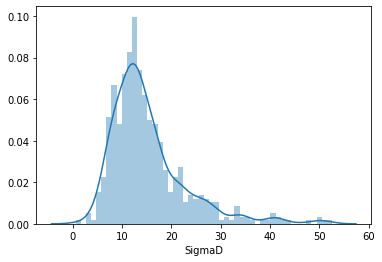

In [57]:
sns.distplot(dataN.SigmaD,bins=50)

In [58]:
#fig, ax = plt.subplots(figsize=(sz*ar,sz))
#plt.scatter(dataN.X,dataN.Y,c=dataN.SigmaD, s=300)
#plt.axis('equal')
#ax.set_xlim(65,145)

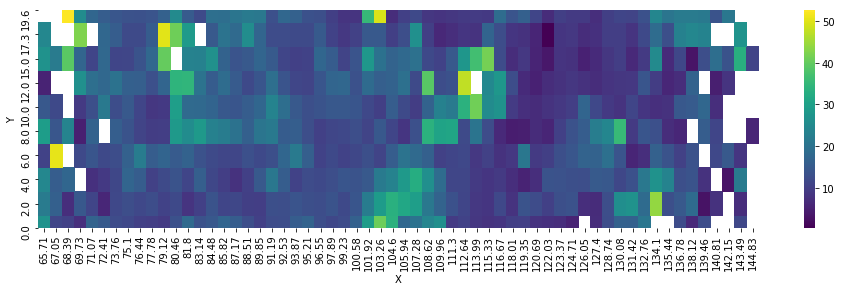

In [59]:
dataNs=(dataN.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataNs, cmap="viridis")
plt.gca().invert_yaxis()


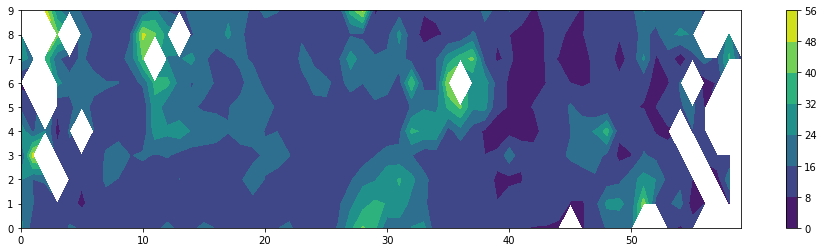

In [60]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataNs)
plt.colorbar()

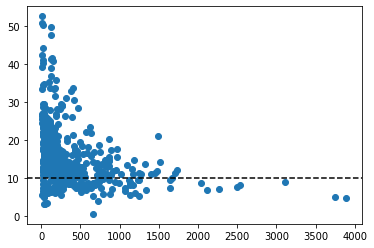

In [61]:
plt.scatter(dataN["Peak.2"],dataN.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')

# [SII] Emission 


In [62]:
ms0=dataS["Peak.4"]>0
dataS=dataS[ms0]

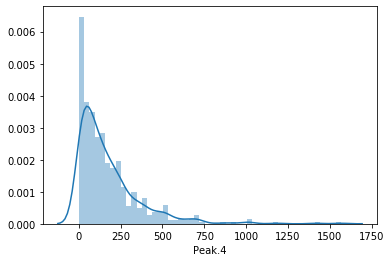

In [63]:
sns.distplot(dataS["Peak.4"],bins=50)

In [64]:
#msf=(dataS["Peak.4"]<5000)&(dataS["Peak.4"]>0)
#dataS=dataS[msf]

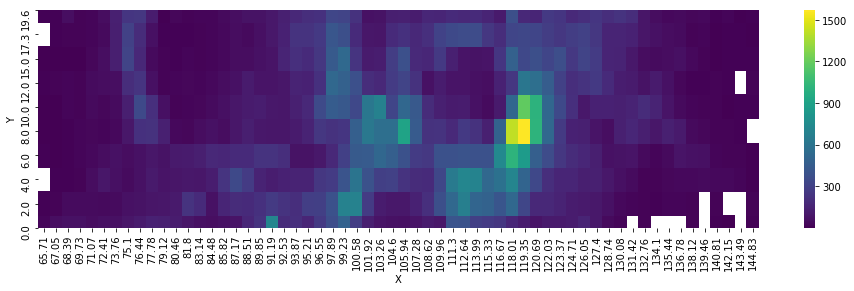

In [65]:
dataSf=(dataS.round(2)).pivot(index='Y', columns='X', values='Peak.4')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataSf, cmap="viridis")
plt.gca().invert_yaxis()


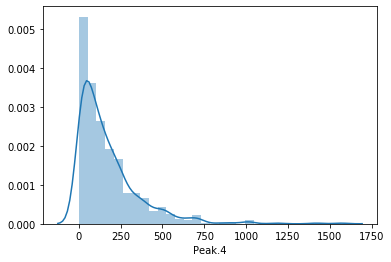

In [66]:
sns.distplot(dataS["Peak.4"],bins=30)

# [SII] Radial velocity 

In [67]:
RVSo=c*(dataS["Center.4"]-ls)/ls
RVS=RVSo+corrhelio
#RVS.describe()

In [68]:
dataS=dataS.assign(RV=RVS.values)
dataS

,X,Y,Center.4,Peak.4,Width.4,RV
41,144.83,19.6,6725.089,10.340,0.717,-237.590424
42,143.49,19.6,6725.229,2.199,1.365,-231.354955
43,142.15,19.6,6725.064,21.540,0.729,-238.703901
44,140.81,19.6,6724.876,12.650,0.727,-247.077245
45,139.46,19.6,6724.784,35.230,1.066,-251.174840
...,...,...,...,...,...,...
1446,71.07,0.0,6725.793,54.330,0.828,-206.234921
1447,69.73,0.0,6725.791,69.700,0.932,-206.323999
1448,68.39,0.0,6725.755,72.650,0.829,-207.927406
1449,67.05,0.0,6725.791,60.920,0.850,-206.323999


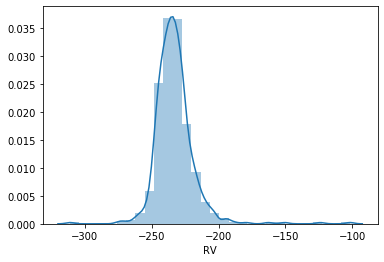

In [69]:
sns.distplot(dataS.RV,bins=30)

In [70]:
ms1=dataS.RV>-300
dataS=dataS[ms1]

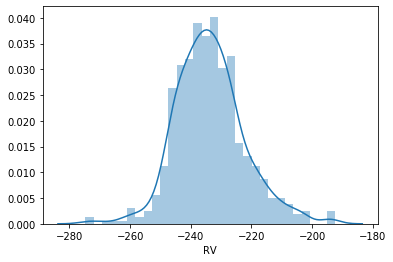

In [71]:
msrv=dataS.RV<dataS.RV.mean()+3*dataS.RV.std()
#msrv=(dataS["RV"]<-180)&(dataS["RV"]>-300)
sns.distplot(dataS.RV[msrv],bins=30)

In [72]:
#fig, ax = plt.subplots(figsize=(sz*ar,sz))
#plt.scatter(dataS.X,dataS.Y,c=dataS.RV, s=300)
#plt.axis('equal')

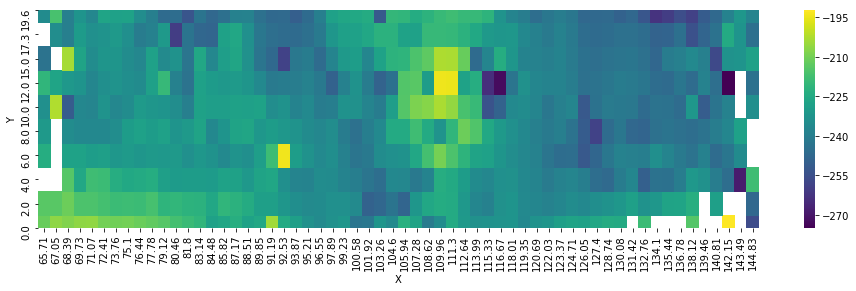

In [73]:
dataSrv=(dataS[msrv].round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataSrv, cmap="viridis")
plt.gca().invert_yaxis()

In [74]:
#dataS=dataS[msrv]

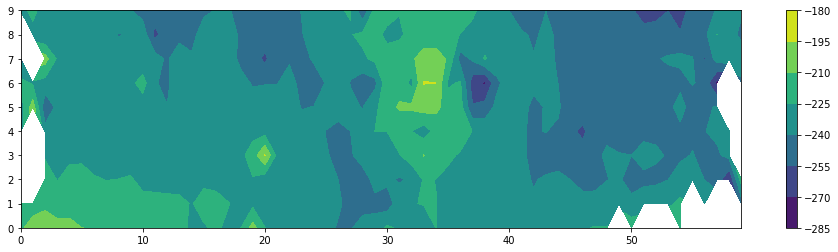

In [75]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataSrv)
plt.colorbar()

# [SII] Width

In [76]:
ms1=dataS["Width.4"]>0
dataS=dataS[ms1]

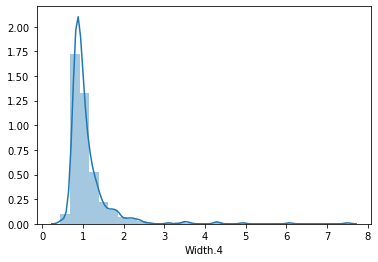

In [77]:
sns.distplot(dataS["Width.4"],bins=30)

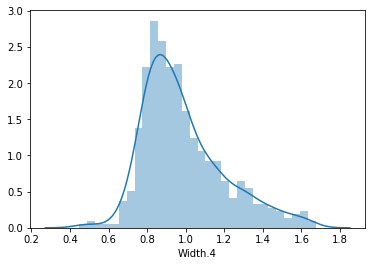

In [78]:
mss=dataS["Width.4"]<(dataS["Width.4"].mean()+1*dataS["Width.4"].std())
sns.distplot(dataS["Width.4"][mss],bins=30)

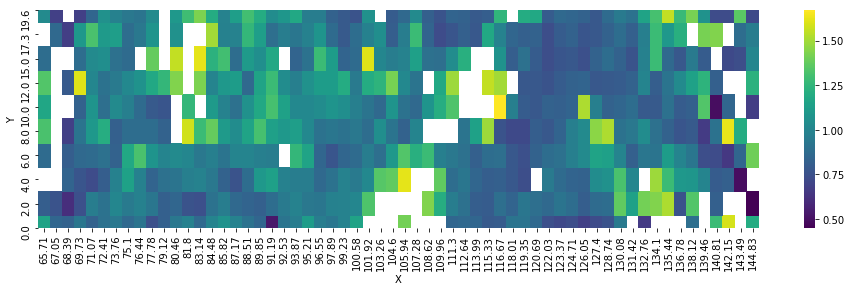

In [79]:
dataSw=(dataS[mss].round(2)).pivot(index='Y', columns='X', values='Width.4')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataSw, cmap="viridis")
plt.gca().invert_yaxis()

In [80]:
dataS=dataS[mss]

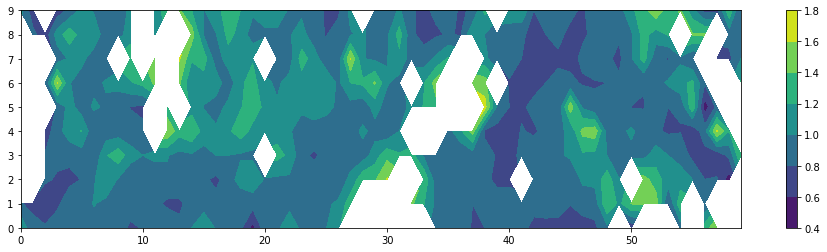

In [81]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataSw)
plt.colorbar()

# [SII] Sig Disp

In [82]:
a=0.6006/1.414
SigmaObsS=a*(dataS["Width.4"]/ln)*c
#SigmaObsS

In [83]:
SigmaTermS=np.sqrt(166.3*(T/10000)/(Sw*1.414))
SigmaTermS

1.750044272166352

In [84]:
SigmaDispS=np.sqrt(SigmaObsS**2-SigmaTermS**2-SigmaInstS**2)
SigmaDispS.describe()

count    472.000000
mean      11.776582
std        6.017473
min        0.405772
25%        7.204060
50%       10.921928
75%       15.594233
max       28.643615
Name: Width.4, dtype: float64

In [85]:
dataS=dataS.assign(SigmaD=SigmaDispS.values)
dataS.describe()

,X,Y,Center.4,Peak.4,Width.4,RV,SigmaD
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,472.000000
mean,105.204576,9.489266,6725.192605,184.878456,0.985209,-232.975976,11.776582
std,22.877365,6.238515,0.297402,197.446685,0.210913,13.246019,6.017473
min,65.710000,0.000000,6724.307000,1.154000,0.449000,-272.419974,0.405772
25%,85.820000,4.000000,6725.022500,50.305000,0.833000,-240.552272,7.204060
50%,104.600000,8.000000,6725.170000,129.800000,0.935000,-233.982760,10.921928
75%,124.710000,15.000000,6725.318500,247.450000,1.096000,-227.368708,15.594233
max,144.830000,19.600000,6728.142000,1568.000000,1.674000,-101.612653,28.643615


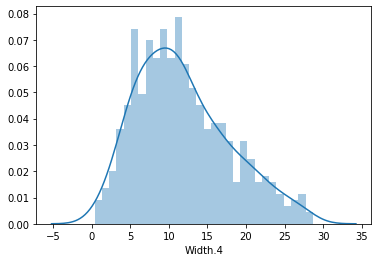

In [86]:
sns.distplot(SigmaDispS,bins=30)

In [87]:
#fig, ax = plt.subplots(figsize=(sz*ar,sz))
#plt.scatter(dataS.X,dataS.Y,c=dataS.SigmaD, s=300)
#plt.axis('equal')
#ax.set_xlim(65,145)

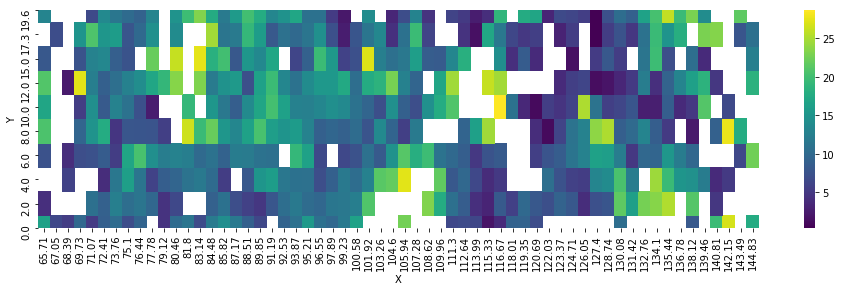

In [88]:
dataSsd=(dataS.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataSsd, cmap="viridis")
plt.gca().invert_yaxis()

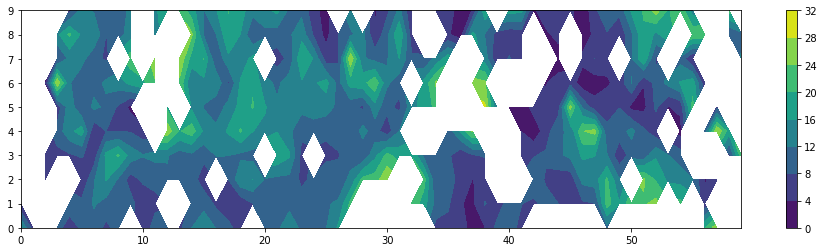

In [89]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataSsd)
plt.colorbar()

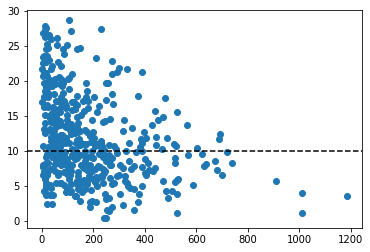

In [90]:
plt.scatter(dataS["Peak.4"],dataS.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')

# Hbeta Emission 

In [91]:
dataHb.describe()

,X,Y,Center,Peak,Width
count,280.000000,280.000000,280.000000,280.000000,280.000000
mean,115.147200,9.390000,4336.614264,-407.575525,-1.840696
std,11.575098,6.262024,1504.940979,7402.643262,28.851671
min,95.836800,0.000000,0.000000,-122900.000000,-345.624000
25%,105.492000,4.000000,4857.087000,30.040000,0.845000
50%,115.147200,9.000000,4857.206500,55.970000,0.984000
75%,124.802400,15.000000,4857.334750,122.575000,1.130250
max,134.457600,19.600000,4858.348000,823.900000,74.950000


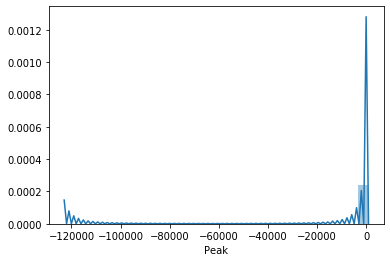

In [92]:
sns.distplot(dataHb.Peak,bins=30)

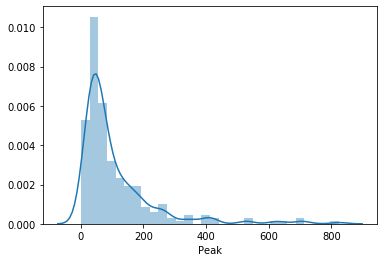

In [93]:
mfhb=(dataHb.Peak>0)
sns.distplot(dataHb[mfhb].Peak,bins=30)

In [94]:
dataHb=dataHb[mfhb]

In [95]:
#fig, ax = plt.subplots(figsize=(sz*ar2,sz))
#plt.scatter(dataHb[mfhb].X,dataHb[mfhb].Y,c=dataHb[mfhb].Peak, s=400)
#plt.axis('equal')

/home/zalenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


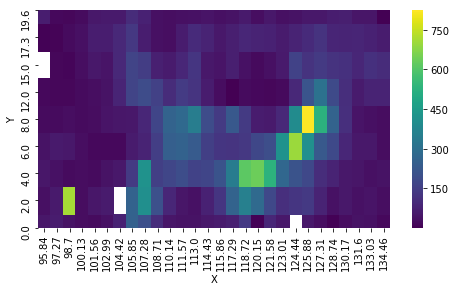

In [96]:
dataOf=(dataHb[mfhb].round(2)).pivot(index='Y', columns='X', values='Peak')
fig, ax = plt.subplots(figsize=(sz*ar2,sz))
sns.heatmap(dataOf, cmap="viridis")
plt.gca().invert_yaxis()

# Hbeta Radial velocity

In [97]:
RVHbo=c*(dataHb.Center.dropna()-lhb)/lhb

In [98]:
RVHb=RVHbo+corrhelio
RVHb.describe()

count     249.000000
mean     -219.971242
std       225.109022
min     -3752.901440
25%      -212.871169
50%      -206.395504
75%      -199.364782
max      -137.876799
Name: Center, dtype: float64

In [99]:
dataHb=dataHb.assign(RV=RVHb.values)
dataHb

,X,Y,Center,Peak,Width,RV
56,134.4576,19.6,4858.348,2.329,-65.669,-137.876799
57,133.0272,19.6,4856.929,46.290,0.993,-225.390788
58,131.5968,19.6,4857.018,46.660,0.984,-219.901891
59,130.1664,19.6,4856.928,68.930,0.857,-225.452461
60,128.7360,19.6,4857.050,67.840,0.870,-217.928355
...,...,...,...,...,...,...
1429,101.5584,0.0,4857.326,25.880,1.261,-200.906607
1430,100.1280,0.0,4857.208,28.400,1.792,-208.184021
1431,98.6976,0.0,4857.600,40.560,1.061,-184.008204
1432,97.2672,0.0,4857.565,63.320,0.790,-186.166759


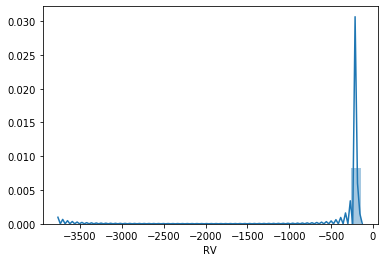

In [100]:
sns.distplot(dataHb.RV,bins=30)

In [101]:
mHb1=dataHb.RV>-500
dataHb=dataHb[mHb1]

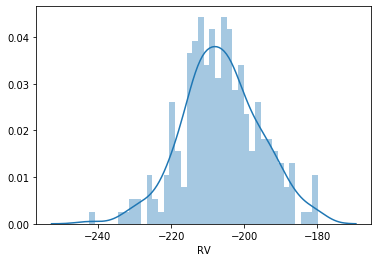

In [102]:
mvhb=dataHb.RV<dataHb.RV.mean()+3*dataHb.RV.std()
sns.distplot(dataHb.RV[mvhb],bins=40)

In [103]:
#fig, ax = plt.subplots(figsize=(14,5))
#plt.scatter(dataHb[mvhb].X,dataHb[mvhb].Y,c=dataHb[mvhb].RV, s=300)
#plt.axis('equal')

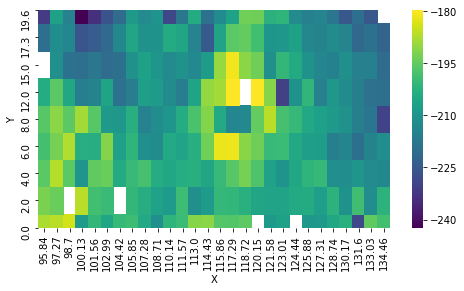

In [104]:
dataHbrv=(dataHb[mvhb].round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(sz*ar2,sz))
sns.heatmap(dataHbrv, cmap="viridis")
plt.gca().invert_yaxis()

In [105]:
dataHb=dataHb[mvhb]

# Hbeta Width

In [106]:
mHb2=dataHb["Width"]>0
dataHb=dataHb[mHb2]

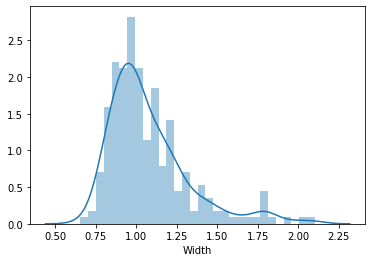

In [107]:
sns.distplot(dataHb.Width,bins=30)

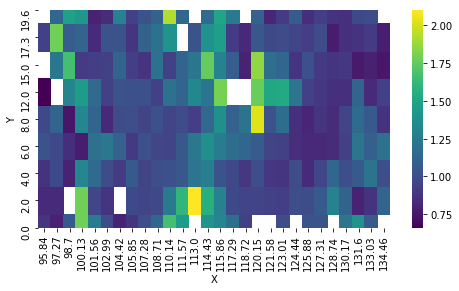

In [108]:
dataHbw=(dataHb.round(2)).pivot(index='Y', columns='X', values='Width')
fig, ax = plt.subplots(figsize=(sz*ar2,sz))
sns.heatmap(dataHbw, cmap="viridis")
plt.gca().invert_yaxis()

In [109]:
#dataHb=dataHb[mshb]

# Hbeta Sig Disp

In [110]:
a=0.6006/1.414
SigmaObsHb=a*(dataHb.Width/lhb)*c
SigmaObsHb

57      26.012390
58      25.776628
59      22.449766
60      22.790311
61      24.073903
          ...    
1429    33.032853
1430    46.942802
1431    27.793701
1432    20.694650
1433    23.157052
Name: Width, Length: 235, dtype: float64

In [111]:
#Sigma therm
SigmaTermH=np.sqrt(166.3*(T/10000)/(Hw*1.414))
SigmaTermH

9.870685562593978

In [112]:
#dataHbs=dataHb
SigmaDispHb=np.sqrt(SigmaObsHb**2-SigmaTerm**2-SigmaInstH**2)
SigmaDispHb.describe()

count    228.000000
mean      18.665891
std        9.143443
min        2.581154
25%       12.754831
50%       16.643861
75%       23.568075
max       51.120123
Name: Width, dtype: float64

In [113]:
dataHb=dataHb.assign(SigmaD=SigmaDispHb.values)
dataHb.describe()

,X,Y,Center,Peak,Width,RV,SigmaD
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,228.000000
mean,115.186764,9.355319,4857.234804,111.910860,1.077055,-206.530922,18.665891
std,11.520332,6.458282,0.169724,121.592536,0.251408,10.467384,9.143443
min,95.836800,0.000000,4856.654000,7.215000,0.655000,-242.350863,2.581154
25%,105.849600,4.000000,4857.129500,39.915000,0.912000,-213.025351,12.754831
50%,114.432000,8.000000,4857.233000,66.980000,1.001000,-206.642196,16.643861
75%,125.875200,15.000000,4857.338500,140.300000,1.185000,-200.135694,23.568075
max,134.457600,19.600000,4857.666000,823.900000,2.103000,-179.937786,51.120123


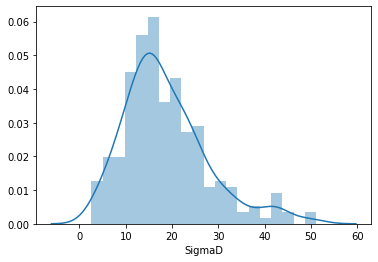

In [114]:
sns.distplot(dataHb.SigmaD,bins=20)

In [115]:
#fig, ax = plt.subplots(figsize=(14,5))
#plt.scatter(dataHb.X,dataHb.Y,c=dataHb.SigmaD, s=300)
#plt.axis('equal')


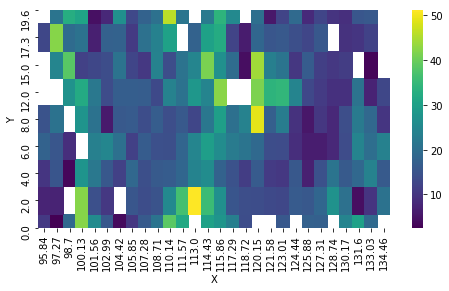

In [116]:
dataHbsg=(dataHb.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(sz*ar2,sz))
sns.heatmap(dataHbsg, cmap="viridis")
plt.gca().invert_yaxis()

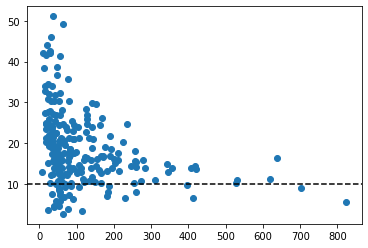

In [117]:
plt.scatter(dataHb.Peak,dataHb.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')

# [OIII] 5007 Emission 

In [118]:
dataO.head()

,X,Y,Center.2,Peak.2,Width.2
56,134.4576,19.6,5002.345,67.83,1.025
57,133.0272,19.6,5002.349,73.47,1.042
58,131.5968,19.6,5002.428,84.22,1.077
59,130.1664,19.6,5002.481,81.87,0.896
60,128.7360,19.6,5002.438,94.54,0.778


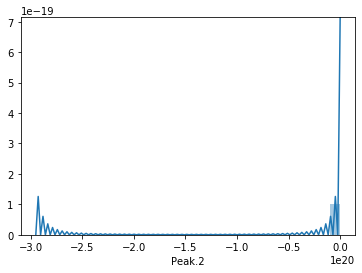

In [119]:
sns.distplot(dataO["Peak.2"],bins=30)

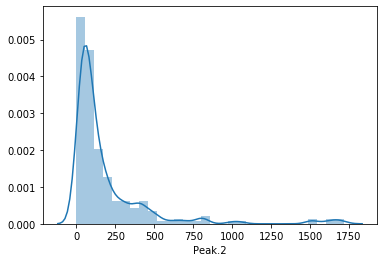

In [120]:
mof=(dataO["Peak.2"]>0)
sns.distplot(dataO["Peak.2"][mof],bins=30)

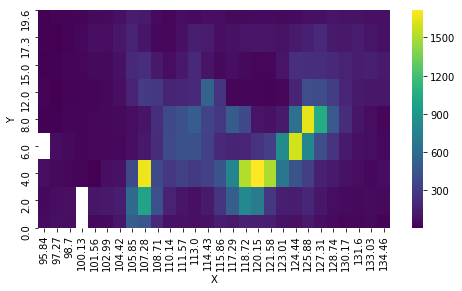

In [121]:
dataOf=(dataO[mof].round(2)).pivot(index='Y', columns='X', values='Peak.2')
fig, ax = plt.subplots(figsize=(sz*ar2,sz))
sns.heatmap(dataOf, cmap="viridis")
plt.gca().invert_yaxis()

In [122]:
dataO=dataO[mof]

# [OIII] 5007 Radial velocity 

In [123]:
RVOo=c*((dataO["Center.2"]-loiii)/loiii)
RVOo.describe()

count    249.000000
mean    -319.566387
std       17.578222
min     -523.978313
25%     -325.713013
50%     -319.607016
75%     -312.662942
max     -236.637298
Name: Center.2, dtype: float64

In [124]:
RVO=RVOo+corrhelio
RVO.describe()

count    249.000000
mean    -293.886387
std       17.578222
min     -498.298313
25%     -300.033013
50%     -293.927016
75%     -286.982942
max     -210.957298
Name: Center.2, dtype: float64

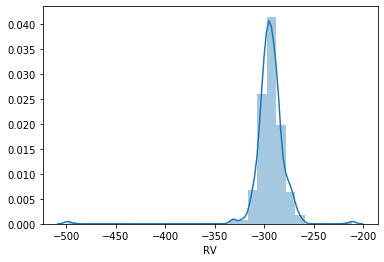

In [125]:
dataO=dataO.assign(RV=RVO.values)
sns.distplot(dataO.RV,bins=30)

In [126]:
mO1=dataO.RV>-350
dataO=dataO[mO1]

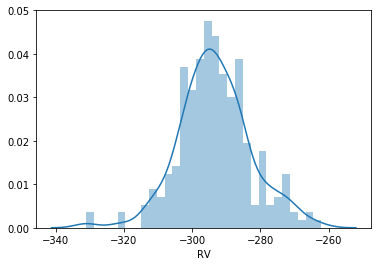

In [127]:
morv=dataO.RV<dataO.RV.mean()+3*dataO.RV.std()
sns.distplot(dataO[morv].RV,bins=30)

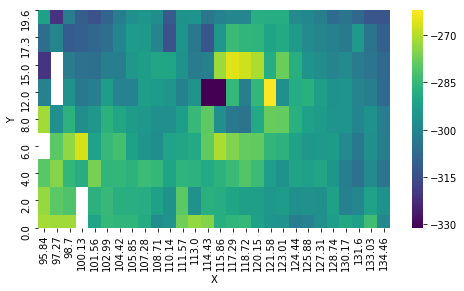

In [128]:
dataOrv=(dataO[morv].round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(sz*ar2,sz))
sns.heatmap(dataOrv, cmap="viridis")
plt.gca().invert_yaxis()

In [129]:
dataO=dataO[morv]

# [OIII] 5007 Width

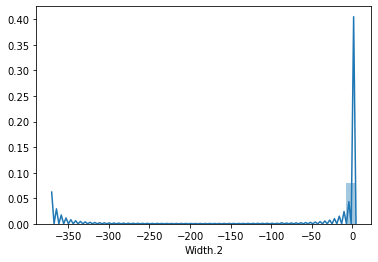

In [130]:
sns.distplot(dataO["Width.2"],bins=30)

In [131]:
mos=(dataO["Width.2"]>0)
dataO=dataO[mos]

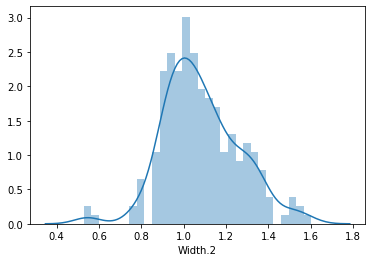

In [132]:
mos=dataO["Width.2"]<(dataO["Width.2"].mean()+1*dataO["Width.2"].std())
sns.distplot(dataO["Width.2"][mos],bins=30)

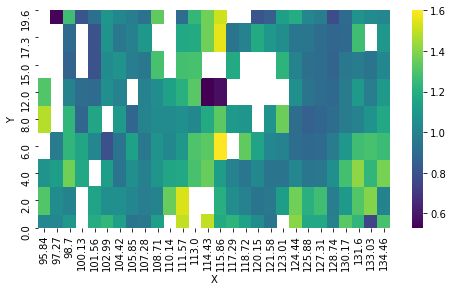

In [133]:
dataOs=(dataO[mos].round(2)).pivot(index='Y', columns='X', values='Width.2')
fig, ax = plt.subplots(figsize=(sz*ar2,sz))
sns.heatmap(dataOs, cmap="viridis")
plt.gca().invert_yaxis()

In [134]:
dataO=dataO[mos]

# [OIII] 5007 Sigma Disp

In [135]:
a=0.6006/1.414
SigmaObsO=a*(dataO["Width.2"][mos]/lhb)*c
SigmaObsO

56      26.850654
57      27.295982
58      28.212833
59      23.471401
60      20.380301
          ...    
1428    32.482742
1429    31.199150
1431    28.762944
1432    26.850654
1433    26.719675
Name: Width.2, Length: 213, dtype: float64

In [136]:
SigmaTermO=np.sqrt(166.3*(T/10000)/(Ow*1.414))
SigmaTermO

2.477495129998606

In [137]:
SigmaDispO=np.sqrt(SigmaObsO**2-SigmaTermO**2-SigmaInstO**2)
SigmaDispO.describe()

count    210.000000
mean      20.758860
std        6.070652
min        3.972121
25%       16.267178
50%       19.952133
75%       24.555601
max       37.365406
Name: Width.2, dtype: float64

In [138]:
dataO=dataO.assign(SigmaD=SigmaDispO.values)
dataO.describe()

,X,Y,Center.2,Peak.2,Width.2,RV,SigmaD
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,210.000000
mean,116.070580,8.929577,5002.668624,215.878028,1.082268,-293.470598,20.758860
std,11.607532,6.582984,0.168075,301.875909,0.179925,10.061422,6.070652
min,95.836800,0.000000,5002.041000,11.570000,0.528000,-331.041898,3.972121
25%,105.849600,4.000000,5002.564000,55.960000,0.958000,-299.733700,16.267178
50%,115.862400,8.000000,5002.668000,109.700000,1.055000,-293.507978,19.952133
75%,125.875200,15.000000,5002.772000,245.600000,1.183000,-287.282256,24.555601
max,134.457600,19.600000,5003.137000,1715.000000,1.603000,-265.432366,37.365406


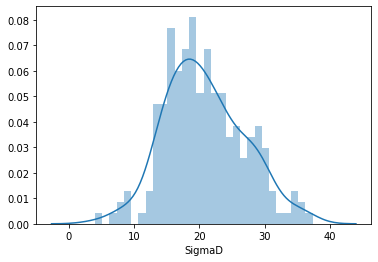

In [139]:
sns.distplot(dataO.SigmaD,bins=30)

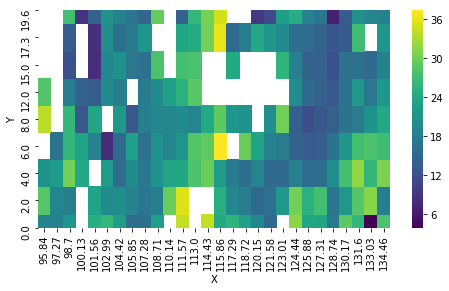

In [140]:
dataOsd=(dataO.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(sz*ar2,sz))
sns.heatmap(dataOsd, cmap="viridis")
plt.gca().invert_yaxis()

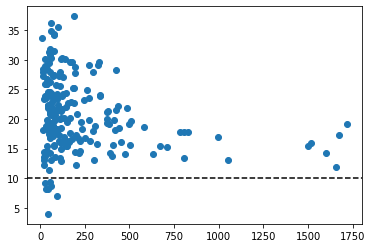

In [141]:
plt.scatter(dataO["Peak.2"],dataO.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')

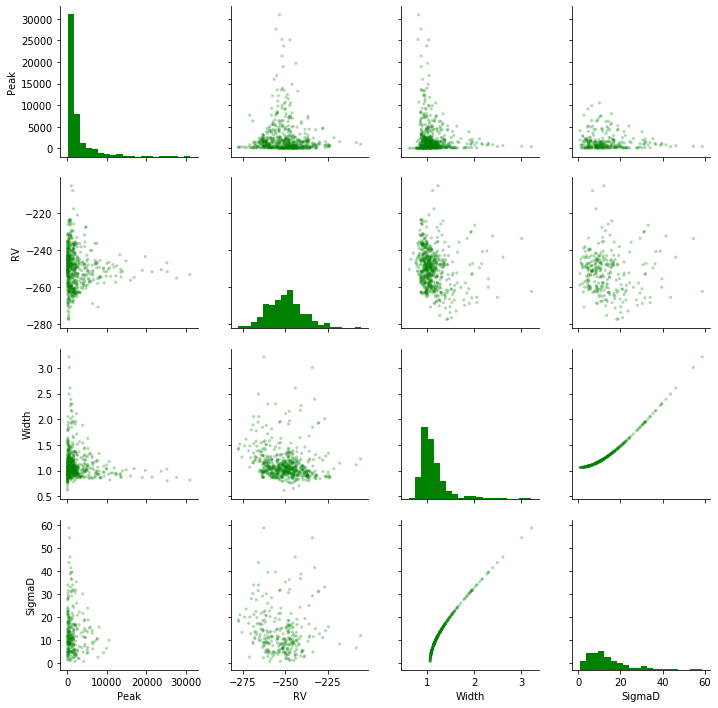

In [142]:
sns.pairplot(dataHs, 
             vars=["Peak","RV","Width","SigmaD"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="green"),
             diag_kws=dict(bins=20, color="green"),
            )

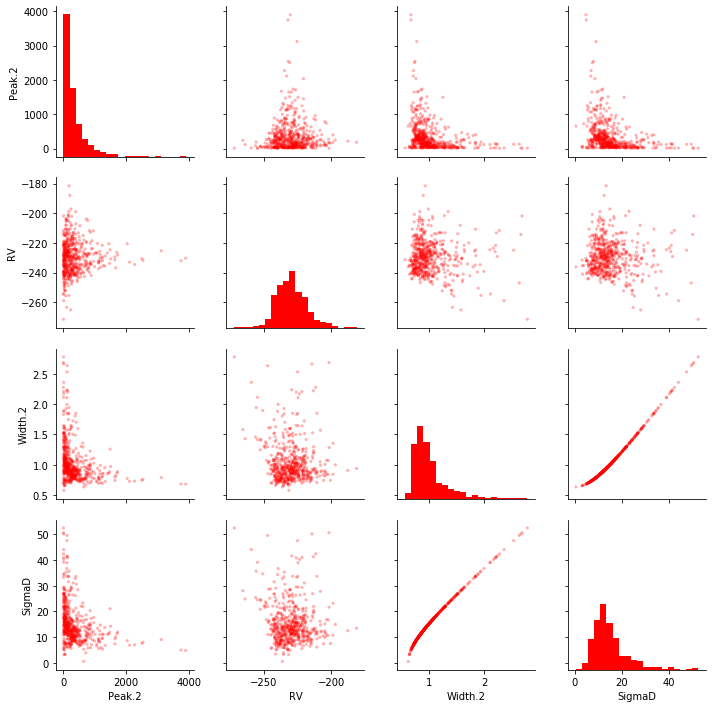

In [143]:
sns.pairplot(dataN, 
             vars=["Peak.2","RV","Width.2","SigmaD"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="red"),
             diag_kws=dict(bins=20,color="red"),
            )

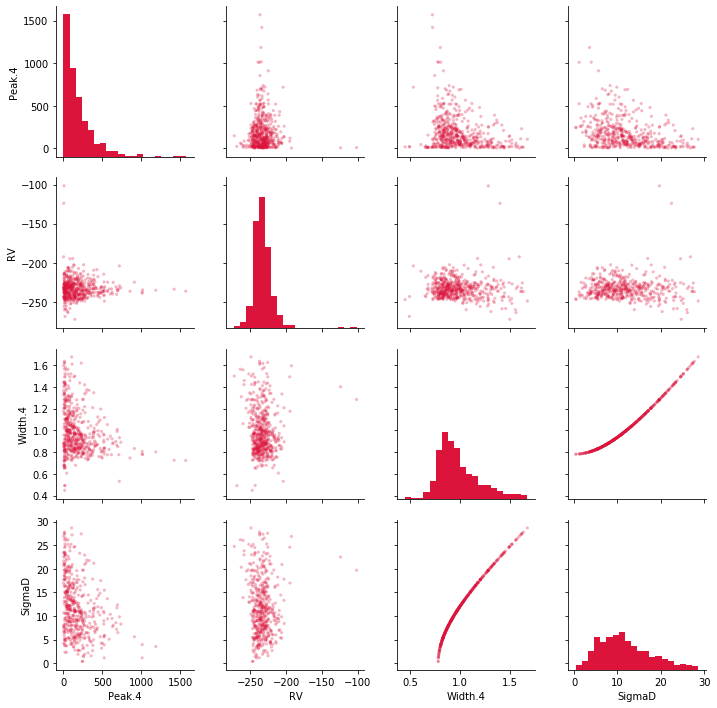

In [144]:
sns.pairplot(dataS, 
             vars=["Peak.4","RV","Width.4","SigmaD"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="crimson"),
             diag_kws=dict(bins=20,color="crimson"),
            )

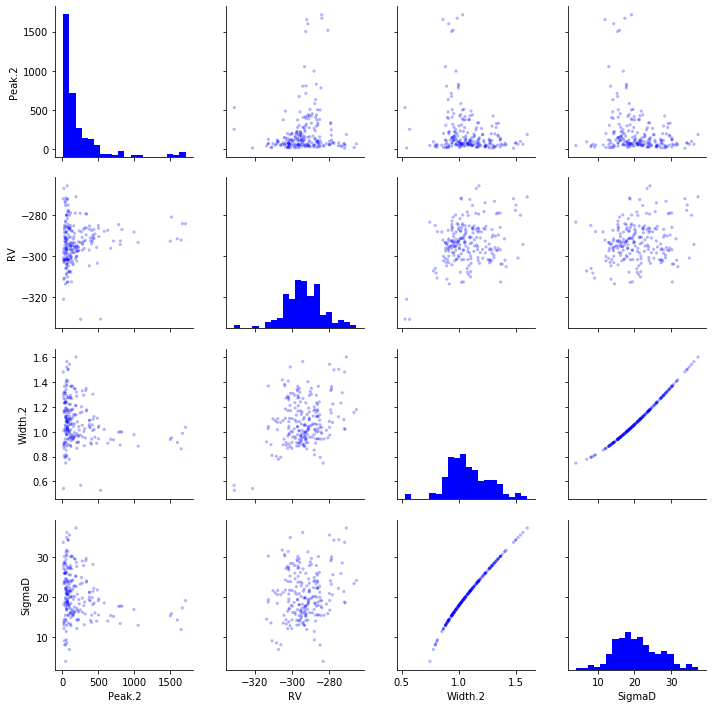

In [145]:
sns.pairplot(dataO, 
             vars=["Peak.2","RV","Width.2","SigmaD"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="blue"),
             diag_kws=dict(bins=20,color="blue"),
            )

In [146]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 89.43123149871826 seconds ---
